In [44]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#Loading Data
transaction_data = pd.read_csv("transaction_data.csv")
purchase_behaviour = pd.read_csv("purchase_behaviour.csv")

In [46]:
#Merging datasets on the basis of loyalty card number
merged_data = pd.merge(transaction_data,purchase_behaviour,on="LYLTY_CARD_NBR")

In [47]:
#Groupping data based on PROD_NAME and TOT_SALES, sorting them in Descending order to find Top # products
product_profit = merged_data.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
product_profit = product_profit.sort_values(by='TOT_SALES', ascending=False)
top_3_products = product_profit.head(3)

In [48]:
#Profiling loyal customer
customer_loyalty = merged_data.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_spent=('TOT_SALES', 'sum'),
    total_quantity=('PROD_QTY', 'sum')
).reset_index()

In [49]:
loyal_customers = customer_loyalty.sort_values(by=['total_spent', 'total_quantity'], ascending=False).head(10)

In [50]:
loyal_customer_profile = loyal_customers[['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'total_spent']]
loyal_customer_profile = loyal_customer_profile.reset_index()

In [51]:
hypothesis = "Loyal customers are predominantly premium buyers with a tendency to purchase larger quantities, likely valuing high-quality or bulk products."

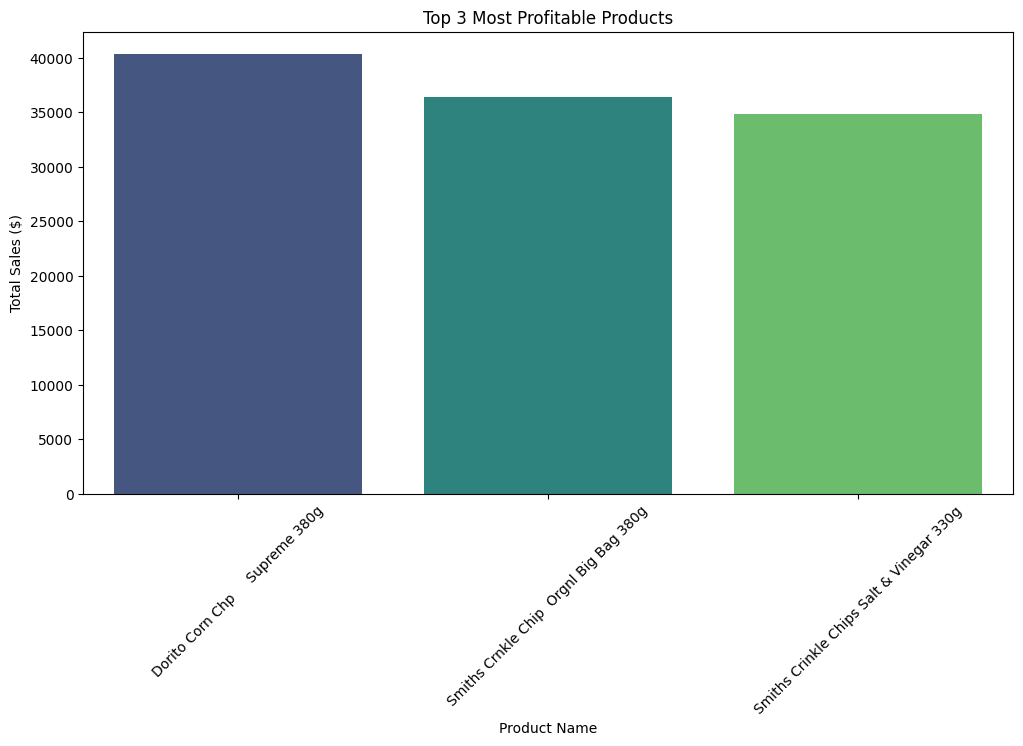

In [52]:
#Visualizing top 3 profitable products
plt.figure(figsize=(12, 6))
sns.barplot(data=top_3_products, x='PROD_NAME', y='TOT_SALES', hue='PROD_NAME', palette='viridis')
plt.title("Top 3 Most Profitable Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

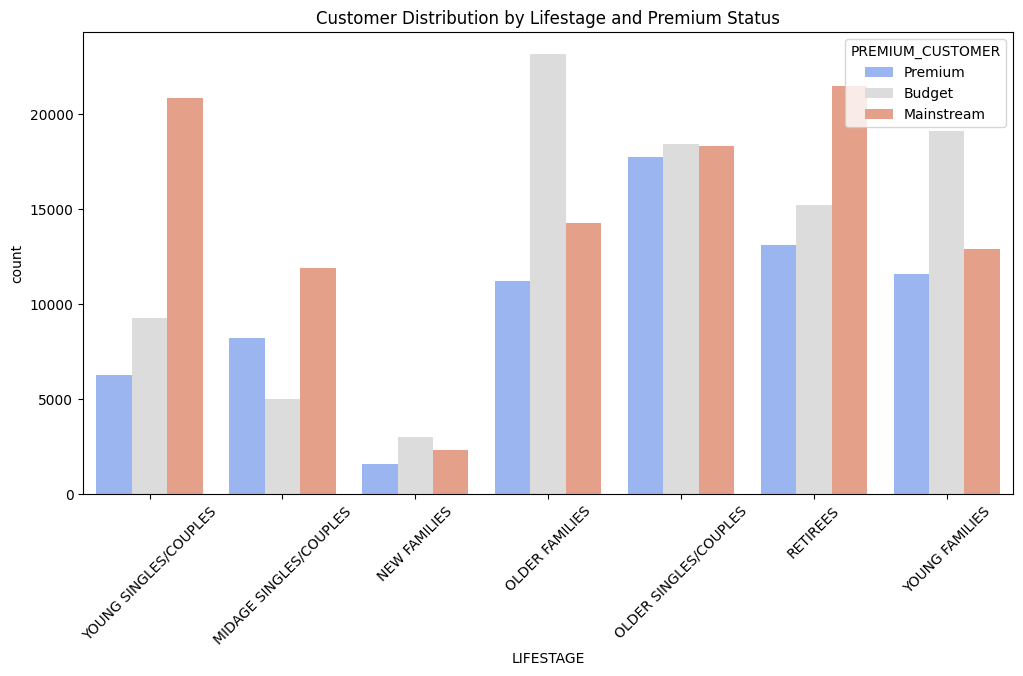

In [53]:
#Visualizing Distribution by Lifestage and Premium Status
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data, x='LIFESTAGE', hue='PREMIUM_CUSTOMER', palette='coolwarm')
plt.title("Customer Distribution by Lifestage and Premium Status")
plt.xticks(rotation=45)
plt.show()

In [54]:
#Function for printing summary
def findings_summary():
    print("Top 3 Most Profitable Products:")
    print(top_3_products.to_string(index=False))
    print("\nCharacteristics of Loyal Customers:")
    print(loyal_customer_profile)
    print("\nHypothesis on Loyalty:")
    print(hypothesis)

    # Concise findings for assignment deliverable
    summary = f"""
    Summary of Findings:
    - The top 3 most profitable products are: {', '.join(top_3_products['PROD_NAME'].tolist())}.
    - Loyal customers are typically from the {loyal_customers.iloc[0]['LIFESTAGE']} lifestage category and are {loyal_customers.iloc[0]['PREMIUM_CUSTOMER'].lower()} customers.
    - These customers tend to spend the most on premium, high-quality products, potentially buying in bulk.
    - Hypothesis: Loyal customers prefer these products due to a combination of quality, brand loyalty, and better offers.
    """
    print(summary)

In [55]:
findings_summary()

Top 3 Most Profitable Products:
                               PROD_NAME  TOT_SALES
        Dorito Corn Chp     Supreme 380g    40352.0
  Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2

Characteristics of Loyal Customers:
   index  LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER  total_spent
0  59694          226000         OLDER FAMILIES          Premium      1300.00
1  60925          230078         OLDER FAMILIES           Budget       138.60
2  17292           63197         OLDER FAMILIES           Budget       132.80
3  69017          259009  OLDER SINGLES/COUPLES       Mainstream       127.20
4  42813          162039         OLDER FAMILIES       Mainstream       126.80
5  16001           58361         YOUNG FAMILIES           Budget       124.80
6  61001          230154         OLDER FAMILIES           Budget       124.40
7  25958           94185         YOUNG FAMILIES          Premium       122.80
8  35338          130

In [31]:
#Storing results to csv
top_3_products.to_csv("top_3_products.csv", index=False)
loyal_customer_profile.to_csv("loyal_customers_profile.csv", index=False)